### Formulas used for sales forecasting



### Intialization of required libraries

In [50]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import math
import collections
import csv

from matplotlib import pyplot as plt
from matplotlib import ticker as tckr
from scipy import stats
from tensorflow.python.platform import gfile


import shutil

print("TensorFlow v" + tf.__version__)
print("Numpy v" + np.__version__)
print("Pandas v" + pd.__version__)

# Setup global style for seaborn
sns.set(style="ticks", color_codes=True)
sns.set_style("darkgrid")

TensorFlow v1.10.1
Numpy v1.14.5
Pandas v0.23.4


### Reading of dataset from csv file as dataframe

In [51]:
df_annual_sales = pd.read_csv('./csv/annual_sales.csv')
df_monthly_sales = pd.read_csv('./csv/monthly_sales.csv')

### Plotting of annual sales

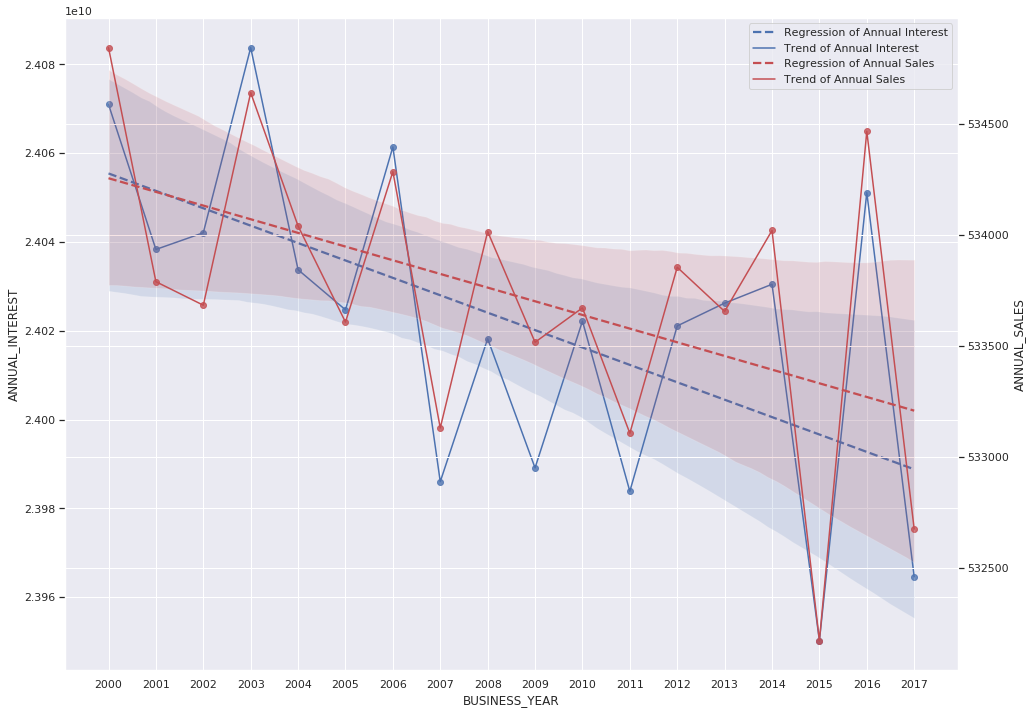

In [52]:
# Declare base figure plot
fig, ax = plt.subplots(figsize=(16, 12))

# Draw regression line for annual interest
ai_reg = sns.regplot(x='BUSINESS_YEAR', y='ANNUAL_INTEREST', label="Annual Interest", data=df_annual_sales, ax=ax, truncate=True, color='b')
ai_reg.xaxis.set_major_locator(tckr.MultipleLocator(1))

# Draw line plot to trace scattered points from regression plot
ai_line = sns.lineplot(x='BUSINESS_YEAR', y='ANNUAL_INTEREST', legend=None, data=df_annual_sales, ax=ax, color='b')

# Make secondary axis to overlap plotting for annual sales
ax2 = ax.twinx()

# Draw regression line for annual sales
as_reg = sns.regplot(x='BUSINESS_YEAR', y='ANNUAL_SALES', label="Annual Sales", data=df_annual_sales, ax=ax2, truncate=True, color='r')
as_reg.xaxis.set_major_locator(tckr.MultipleLocator(1))

# Draw line plot to trace scattered points from regression plot
as_line = sns.lineplot(x='BUSINESS_YEAR', y='ANNUAL_SALES', legend=None, data=df_annual_sales, ax=ax2, color='r')

# Make regression line from base axis and secondary axis dashed lines
ax.lines[0].set_linestyle("--")
ax2.lines[0].set_linestyle("--")

# Compile legends from axes and display it on base axis
hndl_ax = ax.get_lines()
hndl_ax2 = ax2.get_lines()
lg_ax = ["Regression of Annual Interest", "Trend of Annual Interest"]
lg_ax2 = ["Regression of Annual Sales", "Trend of Annual Sales"]
ax.legend(hndl_ax+hndl_ax2, lg_ax+lg_ax2)

### Plotting of monthly sales

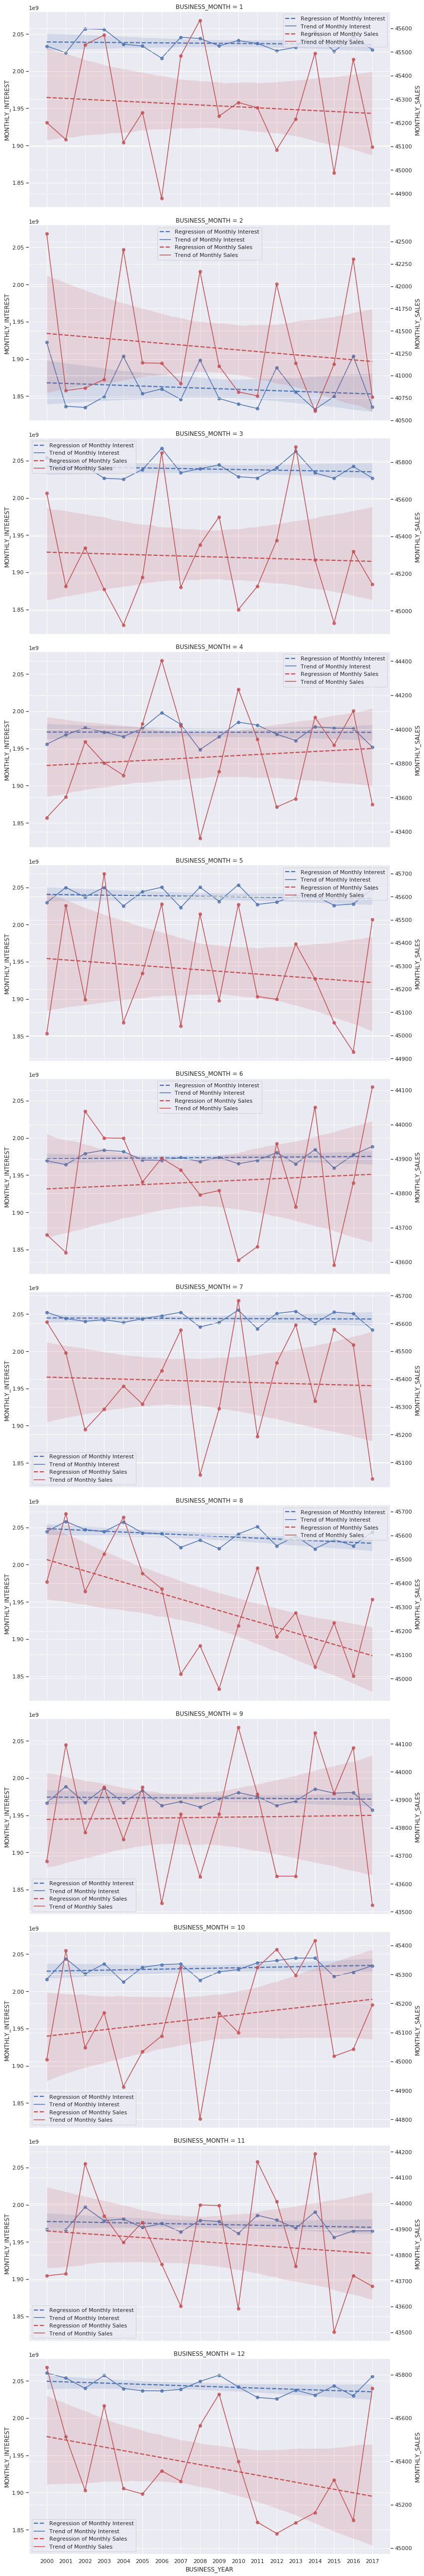

In [53]:
# Define function to plot monthly sales and interest
def monthly_plot(xr, yr, y2r, **kwargs):
    # Get current active base figure and axis to plot on
    ax = mfg.fig.gca()

    # Draw regression line for monthly interest
    mi_reg = sns.regplot(x=xr, y=yr, label="Monthly Interest", data=df_monthly_sales, ax=ax, truncate=True, color='b')
    mi_reg.xaxis.set_major_locator(tckr.MultipleLocator(1))

    # Draw line plot to trace scattered points from regression plot
    mi_line = sns.lineplot(x=xr, y=yr, legend=None, data=df_monthly_sales, ax=ax, color='b')
    
    # Make secondary axis to overlap plotting for monthly sales
    ax2 = ax.twinx()

    # Draw regression line for monthly sales
    ms_reg = sns.regplot(x=xr, y=y2r, label="Monthly Sales", data=df_monthly_sales, ax=ax2, truncate=True, color='r')
    ms_reg.xaxis.set_major_locator(tckr.MultipleLocator(1))

    # Draw line plot to trace scattered points from regression plot
    as_line = sns.lineplot(x=xr, y=y2r, legend=None, data=df_monthly_sales, ax=ax2, color='r')
    as_line.set(ylabel = "MONTHLY_SALES")

    # Make regression line from base axis and secondary axis dashed lines
    ax.lines[0].set_linestyle("--")
    ax2.lines[0].set_linestyle("--")

    # Compile legends from axes and display it on base axis
    hndl_ax = ax.get_lines()
    hndl_ax2 = ax2.get_lines()
    lg_ax = ["Regression of Monthly Interest", "Trend of Monthly Interest"]
    lg_ax2 = ["Regression of Monthly Sales", "Trend of Monthly Sales"]
    mfg.fig.gca().legend(hndl_ax+hndl_ax2, lg_ax+lg_ax2)
    
# Declare facet grid for multiple plotting using business month column
mfg = sns.FacetGrid(df_monthly_sales, col="BUSINESS_MONTH", col_wrap=1, height=6, aspect=2)

# Map per month plotting on facet grid
mfg = mfg.map(monthly_plot, "BUSINESS_YEAR", "MONTHLY_INTEREST", "MONTHLY_SALES")

### Summary of annual and monthly sales dataframe

In [54]:
# Viewing head and summary of annual sales dataframe
print(df_annual_sales.head())
df_annual_sales.describe()

   BUSINESS_YEAR  ANNUAL_SALES  ANNUAL_INTEREST
0           2000        534844     2.407096e+10
1           2001        533789     2.403830e+10
2           2002        533683     2.404206e+10
3           2003        534641     2.408375e+10
4           2004        534040     2.403373e+10


,BUSINESS_YEAR,ANNUAL_SALES,ANNUAL_INTEREST
count,18.000000,18.000000,1.800000e+01
mean,2008.500000,533731.555556,2.402210e+10
std,5.338539,667.285213,3.581978e+07
min,2000.000000,532171.000000,2.395020e+10
25%,2004.250000,533538.750000,2.399639e+10
50%,2008.500000,533736.000000,2.402546e+10
75%,2012.750000,534035.000000,2.404112e+10
max,2017.000000,534844.000000,2.408375e+10


In [55]:
# Viewing head and summary of monthly sales dataframe
print(df_monthly_sales.head())
df_monthly_sales.describe()

   BUSINESS_YEAR  BUSINESS_MONTH  MONTHLY_SALES  MONTHLY_INTEREST
0           2000               1          45201      2.033594e+09
1           2000               2          42589      1.922210e+09
2           2000               3          45633      2.054127e+09
3           2000               4          43482      1.955661e+09
4           2000               5          45008      2.029497e+09


,BUSINESS_YEAR,BUSINESS_MONTH,MONTHLY_SALES,MONTHLY_INTEREST
count,216.000000,216.000000,216.000000,2.160000e+02
mean,2008.500000,6.500000,44477.629630,2.001842e+09
std,5.200179,3.460071,1202.142681,5.402588e+07
min,2000.000000,1.000000,40603.000000,1.832107e+09
25%,2004.000000,3.750000,43844.250000,1.971861e+09
50%,2008.500000,6.500000,45045.000000,2.026027e+09
75%,2013.000000,9.250000,45315.250000,2.040257e+09
max,2017.000000,12.000000,45881.000000,2.066501e+09


### Combining annual and monthly dataframe

In [56]:
df_sales = pd.merge(df_annual_sales, df_monthly_sales, on=['BUSINESS_YEAR', 'BUSINESS_YEAR'])

print(df_sales.head())
df_sales.describe()

   BUSINESS_YEAR  ANNUAL_SALES  ANNUAL_INTEREST  BUSINESS_MONTH  \
0           2000        534844     2.407096e+10               1   
1           2000        534844     2.407096e+10               2   
2           2000        534844     2.407096e+10               3   
3           2000        534844     2.407096e+10               4   
4           2000        534844     2.407096e+10               5   

   MONTHLY_SALES  MONTHLY_INTEREST  
0          45201      2.033594e+09  
1          42589      1.922210e+09  
2          45633      2.054127e+09  
3          43482      1.955661e+09  
4          45008      2.029497e+09  


,BUSINESS_YEAR,ANNUAL_SALES,ANNUAL_INTEREST,BUSINESS_MONTH,MONTHLY_SALES,MONTHLY_INTEREST
count,216.000000,216.000000,2.160000e+02,216.000000,216.000000,2.160000e+02
mean,2008.500000,533731.555556,2.402210e+10,6.500000,44477.629630,2.001842e+09
std,5.200179,649.991017,3.489143e+07,3.460071,1202.142681,5.402588e+07
min,2000.000000,532171.000000,2.395020e+10,1.000000,40603.000000,1.832107e+09
25%,2004.000000,533516.000000,2.398912e+10,3.750000,43844.250000,1.971861e+09
50%,2008.500000,533736.000000,2.402546e+10,6.500000,45045.000000,2.026027e+09
75%,2013.000000,534040.000000,2.404206e+10,9.250000,45315.250000,2.040257e+09
max,2017.000000,534844.000000,2.408375e+10,12.000000,45881.000000,2.066501e+09


### Feature engineering for sales analysis

In [75]:
def add_more_features(df):
    new_df = pd.DataFrame()
    new_df['ANNUAL_SALES'] = df['ANNUAL_SALES'].astype('float64') 
    new_df['ANNUAL_INTEREST'] = df['ANNUAL_INTEREST'].astype('float64') 
    new_df['BUSINESS_YEAR'] = df['BUSINESS_YEAR'].astype('float64') 
    new_df['BUSINESS_MONTH'] = df['BUSINESS_MONTH'].astype('float64') 
    new_df['MONTHLY_SALES'] = df['MONTHLY_SALES'].astype('float64') 
    new_df['MONTHLY_SALES_MEAN'] = (df['MONTHLY_SALES'] / df['ANNUAL_SALES']).astype('float64') 
    new_df['MONTHLY_INTEREST'] = df['MONTHLY_INTEREST'].astype('float64') 
    new_df['MONTHLY_INTEREST_MEAN'] = (df['MONTHLY_INTEREST'] / df['ANNUAL_INTEREST']).astype('float64') 
    
    # Add more feature if needed
    return new_df

df_sales = add_more_features(df_sales)
print(df_sales.head())
df_sales.describe()

   ANNUAL_SALES  ANNUAL_INTEREST  BUSINESS_YEAR  BUSINESS_MONTH  \
0      534844.0     2.407096e+10         2000.0             1.0   
1      534844.0     2.407096e+10         2000.0             2.0   
2      534844.0     2.407096e+10         2000.0             3.0   
3      534844.0     2.407096e+10         2000.0             4.0   
4      534844.0     2.407096e+10         2000.0             5.0   

   MONTHLY_SALES  MONTHLY_SALES_MEAN  MONTHLY_INTEREST  MONTHLY_INTEREST_MEAN  
0        45201.0            0.084512      2.033594e+09               0.084483  
1        42589.0            0.079629      1.922210e+09               0.079856  
2        45633.0            0.085320      2.054127e+09               0.085336  
3        43482.0            0.081298      1.955661e+09               0.081246  
4        45008.0            0.084152      2.029497e+09               0.084313  


,ANNUAL_SALES,ANNUAL_INTEREST,BUSINESS_YEAR,BUSINESS_MONTH,MONTHLY_SALES,MONTHLY_SALES_MEAN,MONTHLY_INTEREST,MONTHLY_INTEREST_MEAN
count,216.000000,2.160000e+02,216.000000,216.000000,216.000000,216.000000,2.160000e+02,216.000000
mean,533731.555556,2.402210e+10,2008.500000,6.500000,44477.629630,0.083333,2.001842e+09,0.083333
std,649.991017,3.489143e+07,5.200179,3.460071,1202.142681,0.002250,5.402588e+07,0.002246
min,532171.000000,2.395020e+10,2000.000000,1.000000,40603.000000,0.076033,1.832107e+09,0.076241
25%,533516.000000,2.398912e+10,2004.000000,3.750000,43844.250000,0.082137,1.971861e+09,0.082116
50%,533736.000000,2.402546e+10,2008.500000,6.500000,45045.000000,0.084414,2.026027e+09,0.084344
75%,534040.000000,2.404206e+10,2013.000000,9.250000,45315.250000,0.084908,2.040257e+09,0.084924
max,534844.000000,2.408375e+10,2017.000000,12.000000,45881.000000,0.085975,2.066501e+09,0.085885


In [101]:
# Export new dataframe to csv
df_sales.to_csv('./csv/df_sales.csv', index=False)#, header=False)

### Model engineering for sales analysis

In [107]:

feature_columns = [
    tf.feature_column.numeric_column("BUSINESS_YEAR"),
    tf.feature_column.numeric_column("BUSINESS_MONTH"),
    tf.feature_column.numeric_column("MONTHLY_SALES"),
    tf.feature_column.numeric_column("MONTHLY_SALES_MEAN"),
    tf.feature_column.numeric_column("MONTHLY_INTEREST"),
    tf.feature_column.numeric_column("MONTHLY_INTEREST_MEAN")
]

head = tf.contrib.estimator.multi_head([
    tf.contrib.estimator.multi_class_head(4, name="ANNUAL_SALES"),
    tf.contrib.estimator.multi_class_head(7, name="ANNUAL_INTEREST"),
])


classifier = tf.contrib.estimator.DNNEstimator(
    feature_columns=feature_columns,
    hidden_units=[10, 20, 10],
    head=head,
    model_dir='./tf'
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './tf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f57a83fab38>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [111]:
Dataset = collections.namedtuple('Dataset', ['data', 'target'])

def load_csv_without_header(filename, target_dtype, features_dtype, target_columns):
    with gfile.Open(filename) as csv_file:
        csv_file.next()
        data_file = csv.reader(csv_file)
        data = []
        targets = {
            target_cols: []
            for target_cols in target_columns.keys()
        }
        for row in data_file:
            cols = sorted(target_columns.items(), key=lambda tup: tup[1], reverse=True)
            for target_col_name, target_col_i in cols:
                targets[target_col_name].append(row.pop(target_col_i))
            data.append(np.asarray(row, dtype=features_dtype))

        targets = {
            target_col_name: np.array(val, dtype=target_dtype[target_col_name])
            for target_col_name, val in targets.items()
        }
        data = np.array(data)
        return Dataset(data=data, target=targets)

def get_input_fn(filename):
    def input_fn():
        dataset = load_csv_without_header(
            filename=filename,
            target_dtype={
                "ANNUAL_SALES": np.float64,
                "ANNUAL_INTEREST": np.float64
            },
            features_dtype=np.float64,
            target_columns= {"ANNUAL_SALES": 0, "ANNUAL_INTEREST": 1}
        ).make_one_shot_iterator()
        x = tf.constant(dataset.data)
        y = {k: tf.constant(v) for k, v in dataset.target.items()}
        print(x)
        print(y)
        return x, y
    return input_fn

source = "./csv/df_sales.csv"

classifier.train(input_fn=get_input_fn(source), steps=4000)
res = classifier.evaluate(input_fn=get_input_fn(source), steps=1)

# print("Validation:", res)

AttributeError: 'Dataset' object has no attribute 'make_one_shot_iterator'